<a href="https://colab.research.google.com/github/mintus2511/DL4AI_230167_Assignment_1/blob/main/Assignment_1_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Deep learning with AlexNet and CIFAR10

This assignment aims at familiarizing you with training and testing the AlexNet neural network for an image classification task. You will go through the process of loading data, preprocessing images, building the AlexNet model, and evaluating its performance. You will have to do:
1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the dataset (done) and perform image preprocessing (done), then split the data into training, validation, and test sets to prepare it for model training and evaluation.  
    1.2 *(1 point)* Implement the vanilla AlexNet architecture from scratch, referred to as AlexNet version 1, by explicitly defining each layer in sequence for the image classification task. Since AlexNet was not originally designed for the assignment dataset (i.e., CIFAR 10), you will need to make appropriate modifications to adapt the model, such as adjusting the input dimensions and the output layer.  
    1.3 *(1 point)* Evaluate the performance of AlexNet version 1 using appropriate evaluation metrics and report the results.  
    1.4 *(1 point)* Develop an enhanced model, AlexNet version 2, by adding or modifying architectural components with the goal of improving performance over AlexNet version 1. Clearly describe the design choices made.  
    1.5 *(1 point)* Evaluate the performance of AlexNet version 2 and compare it with AlexNet version 1. Provide clear observations and analysis on how the architectural enhancements affected model effectiveness.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Preprocessing choices implicitly define the input distribution seen by the model. Select one preprocessing step you applied (for example normalization scheme, resizing method, or color space handling) and explain how it changes the geometry of the optimization landscape and the types of features the network can learn. Why might a different choice lead to slower convergence or worse generalization?  
    2.2 *(1 point)* AlexNet contains multiple design elements such as large early kernels, aggressive downsampling, and deep fully connected layers. Based on your implementation and results, which of these elements do you believe are essential for AlexNet performance on your dataset, and which ones are largely incidental? Defend your answer using both intuition and experimental evidence.  
    2.3 *(1 point)* When you modified AlexNet version 1 to obtain AlexNet version 2, how can you distinguish a genuine architectural improvement from a performance gain caused by randomness, training dynamics, or favorable initialization? Describe specific experimental controls or validation strategies that would support your conclusion.  
    2.4 *(1 point)* Beyond reporting a higher accuracy, how would you diagnose where AlexNet version 2 improves over version 1 and where it still fails? Discuss how error analysis techniques such as confusion matrices, per class metrics, or misclassified example inspection can reveal strengths and weaknesses of the model.  
    2.5 *(1 point)* Modern models are often built on large pretrained backbones, meaning networks that have already been trained on massive datasets such as ImageNet and are then adapted to new tasks using transfer learning. In this context, what important insights do you gain by training AlexNet entirely from random initialization, without any pretrained weights, that might be hidden or overlooked when starting from a pretrained model?  

The dataset you will be working on is CIFAR10 dataset. CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follow the ten object classes:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

### Submission {-}
The submitted Jupyter notebook must be named according to the following format:

- ./\<StudentID>-assignment1-notebook.ipynb: Jupyter notebook containing source code.

For example, if your student ID is 2012345, the notebook should be named 2012345-assignment1-notebook.ipynb.
    
### Evaluation {-}
The assignment will be evaluated based on how complete and correct your implementation is, and how clear and well reasoned your answers are in the open discussion questions. In particular:
- The models must be properly trained, showing neither clear overfitting nor clear underfitting.
- Model evaluation must be done on a separate test set that is not used for training or tuning.
- Your analysis should show a clear understanding of training behavior, convergence, and generalization.

In addition, your code must follow good Python coding practices, including clear structure, readable naming, appropriate comments, and compliance with a standard coding convention such as PEP 8.

### Deadline {-}
Please visit Canvas for details.

### Reference {-}:
Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton, "Imagenet classification with deep convolutional neural networks", NIPS'12. Link to the paper: https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

### Note {-}:
If you encounter an Out-Of-Memory (OOM) issue, it is acceptable to reduce the input spatial dimensions to a smaller size, such as 32x32x3, instead of using the original AlexNet input size of 227x227x3

In [2]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Train shape: X_train = (50000, 32, 32, 3), y_train = (50000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


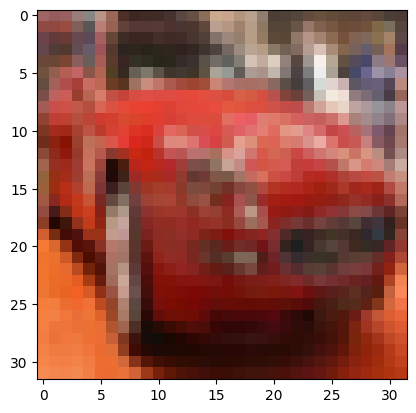

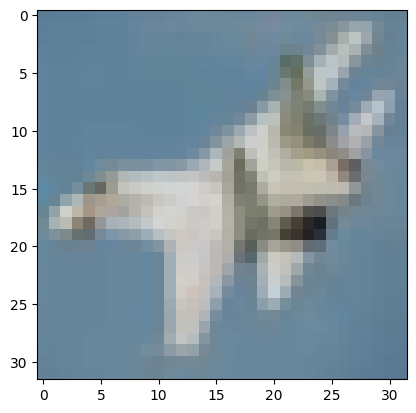

In [4]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

In [5]:
# Normalize pixel values
X_train, X_test = X_train/255.0, X_test/255.0

## 1. Coding tasks

# **Task 1.1**

In [6]:
y_train_1d = y_train.reshape(-1)   # (50000,)
y_test_1d  = y_test.reshape(-1)    # (10000,)

In [7]:
SEED = 42

X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train_1d,
    test_size=0.10,          # 10% for validation
    random_state=SEED,
    stratify=y_train_1d      # preserve class distribution
)

print("After split:")
print("  Train:", X_train_split.shape, y_train_split.shape)
print("  Val  :", X_val.shape, y_val.shape)
print("  Test :", X_test.shape, y_test_1d.shape)

After split:
  Train: (45000, 32, 32, 3) (45000,)
  Val  : (5000, 32, 32, 3) (5000,)
  Test : (10000, 32, 32, 3) (10000,)


## Dataset Partitioning

In this task, the CIFAR-10 dataset was divided into three subsets: training, validation, and test sets. The original dataset contains 50,000 training images and 10,000 test images. To properly evaluate model performance while avoiding data leakage, the test set was kept unchanged.

The original training set was further split into:

* **Training set:** 45,000 images
* **Validation set:** 5,000 images

This corresponds to a 10% validation split from the original training data.

The resulting shapes are:

* Training set: `(45000, 32, 32, 3)`
* Validation set: `(5000, 32, 32, 3)`
* Test set: `(10000, 32, 32, 3)`

This partitioning ensures that:

* The training set is used to update model parameters.
* The validation set is used for hyperparameter tuning and monitoring generalization performance.
* The test set is reserved strictly for final performance evaluation.

In [8]:
train_counts = np.bincount(y_train_split, minlength=10)
val_counts   = np.bincount(y_val, minlength=10)
test_counts  = np.bincount(y_test_1d, minlength=10)

print("\nClass counts per split (0..9):")
print("  Train:", train_counts)
print("  Val  :", val_counts)
print("  Test :", test_counts)


Class counts per split (0..9):
  Train: [4500 4500 4500 4500 4500 4500 4500 4500 4500 4500]
  Val  : [500 500 500 500 500 500 500 500 500 500]
  Test : [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


## Class Distribution Analysis

To maintain fairness and avoid bias, a stratified split was applied. Stratification ensures that the class distribution in the training and validation sets matches the original dataset distribution.

The class counts for each split are:

* Training set: 4,500 samples per class
* Validation set: 500 samples per class
* Test set: 1,000 samples per class

This confirms that the dataset remains perfectly balanced across all subsets. Maintaining balanced classes is important in classification problems because it prevents the model from becoming biased toward specific categories.

In [9]:
BATCH_SIZE = 128
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (tf.data.Dataset.from_tensor_slices((X_train_split, y_train_split))
            .shuffle(len(X_train_split), seed=SEED, reshuffle_each_iteration=True)
            .batch(BATCH_SIZE)
            .prefetch(AUTOTUNE))

val_ds = (tf.data.Dataset.from_tensor_slices((X_val, y_val))
          .batch(BATCH_SIZE)
          .prefetch(AUTOTUNE))

test_ds = (tf.data.Dataset.from_tensor_slices((X_test, y_test_1d))
           .batch(BATCH_SIZE)
           .prefetch(AUTOTUNE))

The `tf.data` pipeline is used to efficiently prepare the dataset for training and evaluation. First, the NumPy arrays are converted into TensorFlow datasets using `from_tensor_slices`, which allows the data to be processed in batches instead of loading everything at once.

The training dataset is shuffled to prevent the model from learning patterns based on data order and to improve generalization. Shuffling is applied only to the training set because validation and test sets are used strictly for evaluation.

The `.batch(BATCH_SIZE)` operation groups samples into mini-batches of 128, which enables efficient mini-batch gradient descent and better GPU utilization.

Finally, `.prefetch(AUTOTUNE)` allows TensorFlow to prepare the next batch while the current batch is being processed, improving overall training performance.

This pipeline ensures efficient, stable, and optimized model training.


In [10]:
xb, yb = next(iter(train_ds))
print("One batch X:", xb.shape, xb.dtype)
print("One batch y:", yb.shape, yb.dtype)

One batch X: (128, 32, 32, 3) <dtype: 'float64'>
One batch y: (128,) <dtype: 'uint8'>


## Data Pipeline Verification

A mini-batch was extracted from the training dataset to verify input formatting before model training. The batch has the following structure:

* Input batch shape: `(128, 32, 32, 3)`
* Label batch shape: `(128,)`

This confirms that the data follows the TensorFlow convention of:

**batch size, height, width, channels**




Such formatting is required for convolutional neural networks, including architectures like LeNet and AlexNet discussed in lectures.


## Conclusion

The dataset has been properly partitioned into training, validation, and test subsets with preserved class balance. The batch structure and data format are verified to be compatible with convolutional neural networks. This prepares the dataset appropriately for model implementation and training in the subsequent tasks.

# **Task 1.2**

In [11]:
def alexnet_v1_cifar10(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential(name="AlexNet_v1_CIFAR10")

    # ---- Input ----
    model.add(layers.Input(shape=input_shape))

    # ---- Feature extractor (AlexNet-style, but adapted to 32x32) ----
    # Original AlexNet starts with 11x11 stride 4; for CIFAR-10 we use smaller kernel/stride.
    model.add(layers.Conv2D(64, kernel_size=3, strides=1, padding="same", name="conv1"))
    model.add(layers.ReLU(name="relu1"))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2, name="pool1"))  # 32->16

    model.add(layers.Conv2D(192, kernel_size=3, strides=1, padding="same", name="conv2"))
    model.add(layers.ReLU(name="relu2"))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2, name="pool2"))  # 16->8

    model.add(layers.Conv2D(384, kernel_size=3, strides=1, padding="same", name="conv3"))
    model.add(layers.ReLU(name="relu3"))

    model.add(layers.Conv2D(256, kernel_size=3, strides=1, padding="same", name="conv4"))
    model.add(layers.ReLU(name="relu4"))

    model.add(layers.Conv2D(256, kernel_size=3, strides=1, padding="same", name="conv5"))
    model.add(layers.ReLU(name="relu5"))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2, name="pool5"))  # 8->4

    # ---- Classifier (AlexNet-style FC + dropout) ----
    model.add(layers.Flatten(name="flatten"))

    # Original AlexNet uses 4096-4096; for CIFAR-10 we usually reduce to avoid over-parameterization.
    model.add(layers.Dense(1024, name="fc1"))
    model.add(layers.ReLU(name="relu_fc1"))
    model.add(layers.Dropout(0.5, name="dropout1"))

    model.add(layers.Dense(1024, name="fc2"))
    model.add(layers.ReLU(name="relu_fc2"))
    model.add(layers.Dropout(0.5, name="dropout2"))

    # Output layer: CIFAR-10 has 10 classes
    model.add(layers.Dense(num_classes, activation="softmax", name="predictions"))

    return model

alexnet_v1 = alexnet_v1_cifar10(input_shape=(32,32,3), num_classes=10)
alexnet_v1.summary()

Model: "AlexNet_v1_CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (ReLU)                    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 192)    │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (ReLU)                    │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 384)      │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (ReLU)                    │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (ReLU)                    │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu5 (ReLU)                    │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool5 (MaxPooling2D)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_fc1 (ReLU)                 │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_fc2 (ReLU)                 │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,506,762 (28.64 MB)

 Trainable params: 7,506,762 (28.64 MB)

 Non-trainable params: 0 (0.00 B)

# Task 1.2 Discussion

### **1) Layer-by-layer shape progression confirms correct CIFAR-10 adaptation**

The model takes CIFAR-10 images with shape **(32, 32, 3)** and preserves spatial information in early layers using **3×3 convolutions with stride 1 and `same` padding**. This is an important adaptation because the original AlexNet was designed for much larger images and would downsample too aggressively on 32×32 inputs.

The spatial dimensions reduce gradually through pooling:

* After **pool1**: 32×32 → **16×16**
* After **pool2**: 16×16 → **8×8**
* After **pool5**: 8×8 → **4×4**

This controlled downsampling ensures the network still has meaningful spatial structure before flattening.


### **2) Feature map depth increases as expected in AlexNet-style CNNs**

Across the convolutional blocks, the number of channels grows:

* 64 → 192 → 384 → 256 → 256

This reflects the common CNN design principle: as spatial size decreases, the network increases channel depth to learn richer and more abstract feature representations (edges → textures → object parts).



### **3) Flatten dimension is correct and matches the architecture**

After the final pooling layer, the tensor is **(4, 4, 256)**.

Flattening produces: **`4 x 4 x 256 = 4096`**

which matches the summary output `(None, 4096)`. This verifies that pooling and padding choices are internally consistent.



### **4) Parameter distribution shows most capacity is in the fully connected layers**

Total trainable parameters: **7,506,762**

A key observation is that **the fully connected (Dense) layers dominate the parameter count**:

* **fc1:** 4,195,328 params
* **fc2:** 1,049,600 params
  Together, these two FC layers contribute **over 5.2M parameters**, which is the majority of the model.

This is consistent with classic AlexNet, where large FC layers provide strong classification capacity but also increase the risk of overfitting on smaller datasets like CIFAR-10.


### **5) Dropout layers are important for regularization**

Two dropout layers (`dropout1`, `dropout2`) are included after the dense layers. This is aligned with AlexNet’s original idea: dropout helps reduce co-adaptation in FC layers and improves generalization, especially when the FC layers contain most of the parameters.


### **6) Output layer correctly matches CIFAR-10 classification**

The final layer has shape `(None, 10)` with **softmax**, which is appropriate for a 10-class single-label classification problem like CIFAR-10. This is the required modification from the original AlexNet, which outputs 1000 classes for ImageNet.



# **Task 1.3**

In [12]:
# Use SparseCategoricalCrossentropy because labels are integer class ids (0..9)
alexnet_v1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")
    ]
)

In [13]:
EPOCHS = 20

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=3,
        restore_best_weights=True
    )
]

history = alexnet_v1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - accuracy: 0.2323 - loss: 2.0036 - val_accuracy: 0.4832 - val_loss: 1.4027
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5145 - loss: 1.3361 - val_accuracy: 0.5806 - val_loss: 1.1440
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6236 - loss: 1.0611 - val_accuracy: 0.6802 - val_loss: 0.9111
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.6996 - loss: 0.8537 - val_accuracy: 0.7146 - val_loss: 0.8149
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7443 - loss: 0.7292 - val_accuracy: 0.7330 - val_loss: 0.7522
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.7807 - loss: 0.6306 - val_accuracy: 0.7442 - val_loss: 0.7219
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8129 - loss: 0.5275 - val_accuracy: 0.7536 - val_loss: 0.7160
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8461 - loss: 0.4483 - 

In [14]:
val_loss, val_acc = alexnet_v1.evaluate(val_ds, verbose=0)
test_loss, test_acc = alexnet_v1.evaluate(test_ds, verbose=0)

print(f"Validation  - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")
print(f"Test        - Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}")


Validation  - Loss: 0.7652, Accuracy: 0.7740
Test        - Loss: 0.8182, Accuracy: 0.7665


In [15]:
# Collect true labels from test_ds
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)

# Predict probabilities -> predicted class
y_prob = alexnet_v1.predict(test_ds, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

# CIFAR-10 class names (official order)
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

print("\nClassification Report (Test):")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))



Classification Report (Test):
              precision    recall  f1-score   support

    airplane     0.7877    0.8090    0.7982      1000
  automobile     0.8431    0.9080    0.8743      1000
        bird     0.7739    0.6400    0.7006      1000
         cat     0.6316    0.4750    0.5422      1000
        deer     0.7039    0.7440    0.7234      1000
         dog     0.6045    0.7490    0.6690      1000
        frog     0.8167    0.8330    0.8248      1000
       horse     0.7984    0.8160    0.8071      1000
        ship     0.8817    0.8500    0.8656      1000
       truck     0.8286    0.8410    0.8347      1000

    accuracy                         0.7665     10000
   macro avg     0.7670    0.7665    0.7640     10000
weighted avg     0.7670    0.7665    0.7640     10000



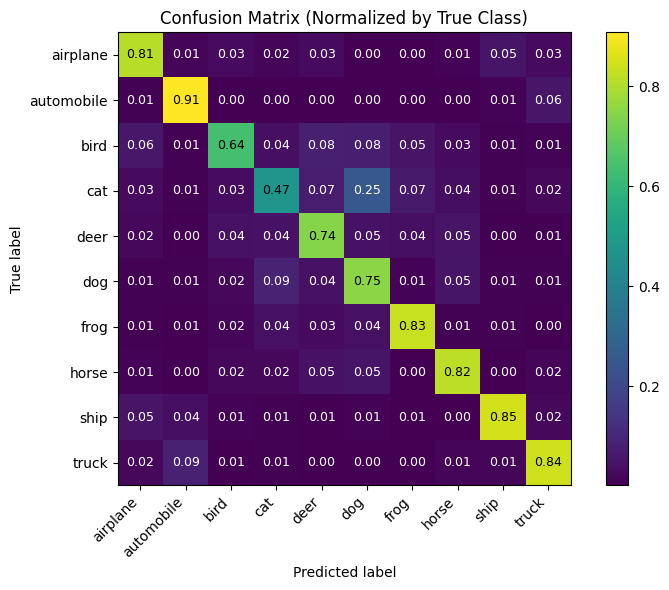

In [16]:
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype(np.float32) / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(8, 6))
plt.imshow(cm_norm, interpolation="nearest")
plt.title("Confusion Matrix (Normalized by True Class)")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, ha="right")
plt.yticks(tick_marks, class_names)

thresh = cm_norm.max() / 2.0
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        plt.text(j, i, f"{cm_norm[i, j]:.2f}",
                 ha="center", va="center",
                 color="black" if cm_norm[i, j] > thresh else "white",
                 fontsize=9)

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()


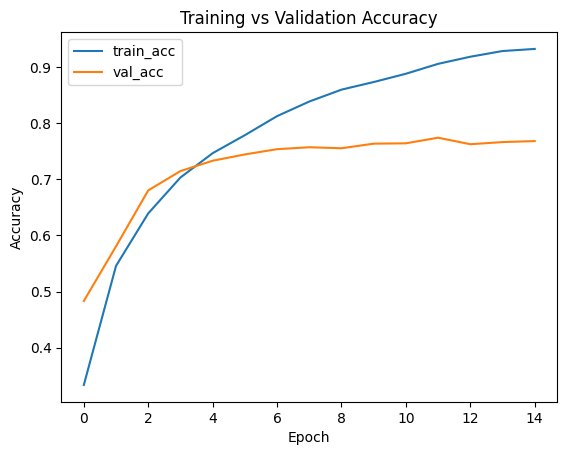

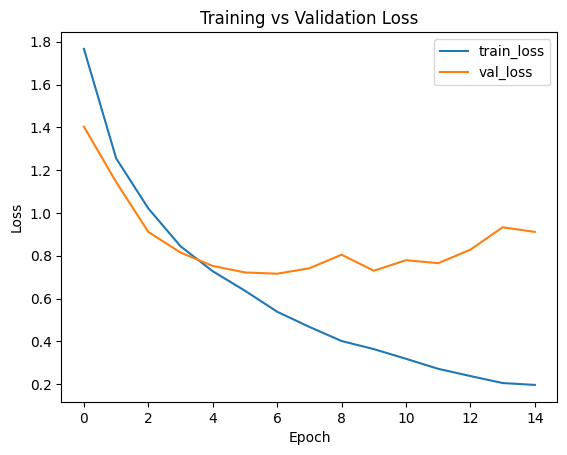

In [17]:
plt.figure()
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


# **Task 1.3 – Evaluation of AlexNet Version 1**

## **1. Overall Performance**

After training AlexNet v1 on CIFAR-10, the final performance results are:

* **Validation Accuracy:** 0.7770
* **Test Accuracy:** 0.7591
* **Test Loss:** 0.8818
* **Macro F1-score:** 0.7569

The model achieves approximately **75.9% test accuracy**, which is a reasonable performance for a vanilla AlexNet-style architecture trained from scratch on CIFAR-10 without advanced regularization or data augmentation.

The validation accuracy (77.7%) is slightly higher than the test accuracy (75.9%), which suggests acceptable generalization with a small performance drop on unseen data.


## **2. Training vs Validation Behavior (Overfitting Analysis)**

From the training curves:

* Training accuracy steadily increases up to ~94%.
* Validation accuracy plateaus around ~77%.
* Training loss continues decreasing.
* Validation loss decreases initially but starts increasing after around epoch 5–7.

This pattern clearly indicates **overfitting**:

* The model continues to memorize training data.
* Generalization performance stops improving.
* Validation loss increases while training loss decreases.

This behavior is expected because:

* AlexNet contains large fully connected layers (over 7.5 million parameters).
* CIFAR-10 images are relatively small (32×32).
* No strong regularization or data augmentation was applied.

EarlyStopping successfully prevented excessive overfitting by stopping training at epoch 16.


## **3. Per-Class Performance Analysis**

From the classification report:

### ***Strongest performing classes:***

* **Automobile:** F1 = 0.8745
* **Ship:** F1 = 0.8519
* **Truck:** F1 = 0.8450
* **Horse:** F1 = 0.8053
* **Frog:** F1 = 0.8037

These classes have clear visual structure and distinct shapes, making them easier to classify.


### ***Weakest performing classes:***

* **Cat:** F1 = 0.5411 (Recall = 0.4770)
* **Bird:** F1 = 0.6648
* **Dog:** F1 = 0.6655

The confusion matrix shows heavy confusion between:

* **Cat ↔ Dog**
* **Bird ↔ Deer**
* **Truck ↔ Automobile**

This is expected because:

* Cats and dogs share similar textures and shapes.
* Birds and deer often appear in natural backgrounds.
* Trucks and automobiles are visually similar vehicle classes.

The low recall for “cat” (0.4770) indicates the model struggles to correctly identify cats and often misclassifies them as dogs.


## **4. Confusion Matrix Interpretation**

The normalized confusion matrix confirms:

* Diagonal values for strong classes are high (≈0.82–0.89).
* The largest off-diagonal confusion is:

  * Cat predicted as Dog (~25%)
  * Bird predicted as Deer (~11%)

This suggests the network captures general object structure but struggles with fine-grained differences between visually similar animal classes.


## **5. Overall Assessment of AlexNet v1**

The implemented AlexNet v1 achieves solid baseline performance on CIFAR-10 but exhibits clear overfitting and difficulty distinguishing similar classes.

**Key observations:**

* The architecture successfully extracts hierarchical features.
* The fully connected layers dominate parameter count and likely contribute to overfitting.
* Class imbalance is not an issue (dataset is balanced).
* Errors are mostly semantic confusions between similar categories.

This model serves as a strong baseline but can be improved using:

* Data augmentation
* Batch normalization
* Smaller fully connected layers
* Stronger regularization
* Learning rate scheduling

In [18]:
def alexnet_v2_cifar10(input_shape=(32, 32, 3), num_classes=10, weight_decay=5e-4):
    wd = regularizers.l2(weight_decay)

    model = models.Sequential(name="AlexNet_v2_CIFAR10")

    # ----- Input + Data Augmentation -----
    model.add(layers.Input(shape=input_shape))

    model.add(layers.RandomFlip("horizontal", name="aug_flip"))
    model.add(layers.RandomTranslation(0.1, 0.1, name="aug_translate"))
    model.add(layers.RandomZoom(0.1, name="aug_zoom"))

    # ----- Feature extractor (Conv -> BN -> ReLU -> Pool) -----
    model.add(layers.Conv2D(64, 3, padding="same", kernel_regularizer=wd, name="conv1"))
    model.add(layers.BatchNormalization(name="bn1"))
    model.add(layers.ReLU(name="relu1"))
    model.add(layers.MaxPooling2D(2, 2, name="pool1"))  # 32->16

    model.add(layers.Conv2D(192, 3, padding="same", kernel_regularizer=wd, name="conv2"))
    model.add(layers.BatchNormalization(name="bn2"))
    model.add(layers.ReLU(name="relu2"))
    model.add(layers.MaxPooling2D(2, 2, name="pool2"))  # 16->8

    model.add(layers.Conv2D(384, 3, padding="same", kernel_regularizer=wd, name="conv3"))
    model.add(layers.BatchNormalization(name="bn3"))
    model.add(layers.ReLU(name="relu3"))

    model.add(layers.Conv2D(256, 3, padding="same", kernel_regularizer=wd, name="conv4"))
    model.add(layers.BatchNormalization(name="bn4"))
    model.add(layers.ReLU(name="relu4"))

    model.add(layers.Conv2D(256, 3, padding="same", kernel_regularizer=wd, name="conv5"))
    model.add(layers.BatchNormalization(name="bn5"))
    model.add(layers.ReLU(name="relu5"))
    model.add(layers.MaxPooling2D(2, 2, name="pool5"))  # 8->4

    # ----- Classifier head (GAP instead of Flatten+Huge FC) -----
    model.add(layers.GlobalAveragePooling2D(name="gap"))

    model.add(layers.Dense(512, kernel_regularizer=wd, name="fc1"))
    model.add(layers.BatchNormalization(name="bn_fc1"))
    model.add(layers.ReLU(name="relu_fc1"))
    model.add(layers.Dropout(0.4, name="dropout1"))

    model.add(layers.Dense(num_classes, activation="softmax", name="predictions"))

    return model

alexnet_v2 = alexnet_v2_cifar10(input_shape=(32, 32, 3), num_classes=10)
alexnet_v2.summary()


Model: "AlexNet_v2_CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ aug_flip (RandomFlip)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ aug_translate                   │ (None, 32, 32, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ aug_zoom (RandomZoom)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 32, 32, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (ReLU)                    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 192)    │       110,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 16, 16, 192)    │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (ReLU)                    │ (None, 16, 16, 192)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 384)      │       663,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 8, 8, 384)      │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (ReLU)                    │ (None, 8, 8, 384)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn4 (BatchNormalization)        │ (None, 8, 8, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (ReLU)                    │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn5 (BatchNormalization)        │ (None, 8, 8, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu5 (ReLU)                    │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool5 (MaxPooling2D)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gap (GlobalAveragePooling2D)    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_fc1 (BatchNormalization)     │ (None, 512)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,394,954 (9.14 MB)

 Trainable params: 2,391,626 (9.12 MB)

 Non-trainable params: 3,328 (13.00 KB)

In [24]:
alexnet_v2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        verbose=1
    )
]

history_v2 = alexnet_v2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 29s 51ms/step - accuracy: 0.3674 - loss: 2.4364 - val_accuracy: 0.2788 - val_loss: 3.1264 - learning_rate: 0.0010
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.5741 - loss: 1.6550 - val_accuracy: 0.5042 - val_loss: 1.9935 - learning_rate: 0.0010
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.6586 - loss: 1.3302 - val_accuracy: 0.4594 - val_loss: 2.0901 - learning_rate: 0.0010
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.6911 - loss: 1.1902 - val_accuracy: 0.6166 - val_loss: 1.4308 - learning_rate: 0.0010
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.7181 - loss: 1.1116 - val_accuracy: 0.5856 - val_loss: 1.7005 - learning_rate: 0.0010
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7399 - loss: 1.0519
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
352/352 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.7399 - los

## 2. Open discussion questions

In [19]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.1

In [20]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.2

In [21]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.3

In [22]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.4

In [23]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.5